In [5]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [6]:
import numpy as np
from scipy.interpolate import interp1d
import matplotlib.pyplot as pl
import qnm_filter
import qnm

In [7]:
time=np.arange(-100,200,0.1)
chi=0.68
omega220=qnm.modes_cache(s=-2,l=2,m=2,n=0)(a=chi)[0]
omega221=qnm.modes_cache(s=-2,l=2,m=2,n=1)(a=chi)[0]
data=np.real(np.exp(-1j*omega220*abs(time))+0*np.exp(1j*0.4-1j*omega221*abs(time)))

In [17]:
# nr_dataset_short=qnm_filter.RealData(data, index=time)
nr_dataset=qnm_filter.pad_data_for_fft(qnm_filter.RealData(data, index=time), 2,2)
waveform=qnm_filter.RealData(nr_dataset[1], index=nr_dataset[0])
# nr_dataset=nr_dataset_short

In [20]:
fit = qnm_filter.Network()
fit.original_data['H1'] = waveform

In [22]:
fit.add_filter(mass=1/qnm_filter.Filter.mass_unit(1), chi=chi, model_list = [(2, 2, 0,'p')])

Text(0, 0.5, 'linear scale')

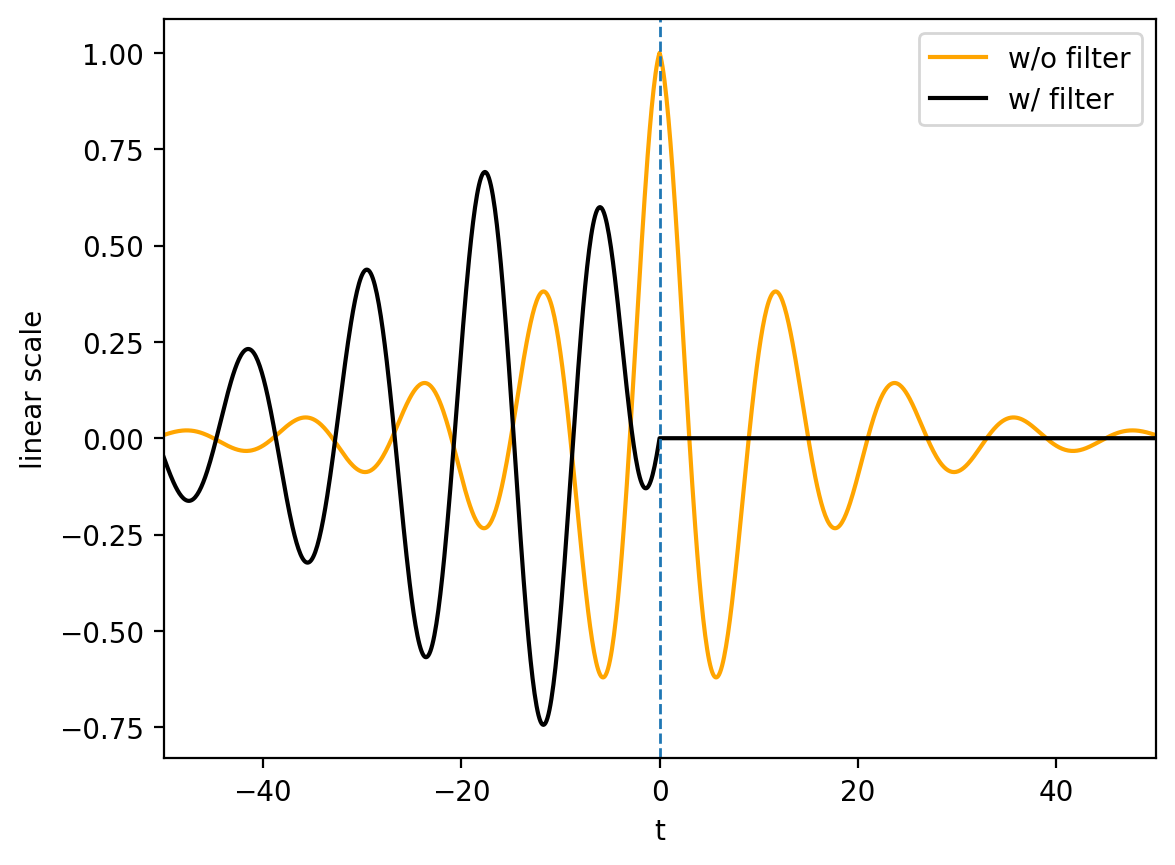

In [25]:
waveform.plot(color='orange',label='w/o filter')
fit.filtered_data['H1'].plot(color='k',label='w/ filter')
pl.axvline(x=0, ls='--',lw=1)
pl.xlim(-50,50)
pl.legend()
pl.xlabel('t')
pl.ylabel('linear scale')
# pl.savefig('ringup_ringdown/ringup_ringdown.pdf',bbox_inches='tight')

(1e-08, 2)

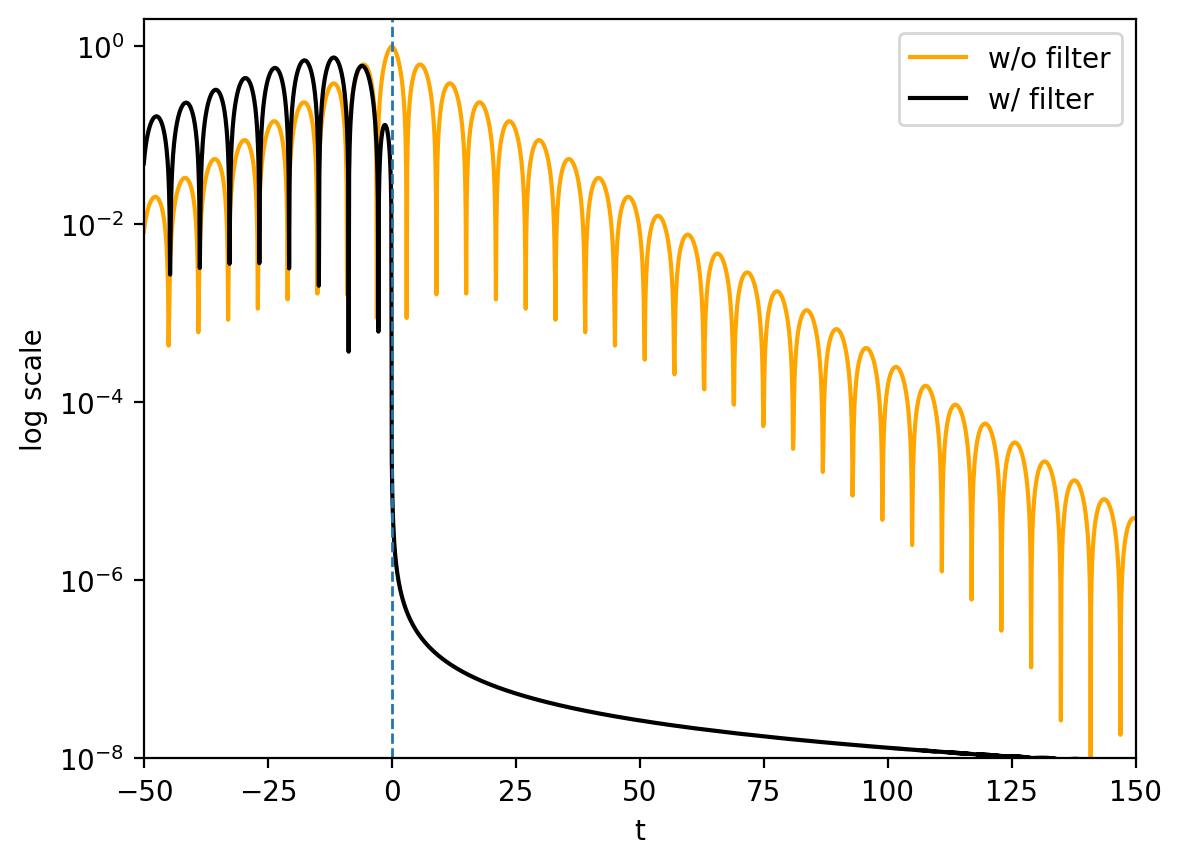

In [28]:
pl.semilogy(waveform.index,abs(waveform.values),color='orange',label='w/o filter')
pl.semilogy(fit.filtered_data['H1'].index,abs(fit.filtered_data['H1'].values),color='k',label='w/ filter')
pl.axvline(x=0, ls='--',lw=1)
pl.legend()
pl.xlabel('t')
pl.ylabel('log scale')
pl.xlim(-50,150)
pl.ylim(1e-8,2)
# pl.savefig('ringup_ringdown/log_ringup_ringdown.pdf',bbox_inches='tight')